In [1]:

import numpy as np
import pandas as pd
import seaborn as sns


from moseq2_lda.data import load_representations
from moseq2_lda.model import create_lda_pipeline, run_cross_validation, train_lda_pipeline
from moseq2_lda.viz import plot_lda_results, plot_validation_curve, plot_permutation_score, Aesthetics
#%matplotlib qt

In [2]:
model_file = r"H:\Tischfield_Lab_ISI\MoSeq\moseq2\Analysis\Meloxicam\2022-09-02_moseq\models-mean-target\rOT_model_1000-5.fixed.p"
index_file = r"H:\Tischfield_Lab_ISI\MoSeq\moseq2\Analysis\Meloxicam\2022-09-02_moseq\moseq2-index.role.yaml"

max_syllable = 70

#groups = ['baseline', '4hrs carrageenan', '24hrs saline', '24hrs meloxicam', 'baseline meloxicam']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493', '#020887', '#647aa3'])
#markers = ['o', 's', '^', 'P', 'X']


#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan + saline']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493'])
#markers = ['o', 's', '^']
#groups = None
#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan']

#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan', '24hrs carrageenan + saline', '24hrs carrageenan + meloxicam']
#palette = sns.color_palette('deep', n_colors=len(groups))
#markers = ['o', 'v', '^', '<', '>', 's', 'p', 'P', 'D', 'X', '*', 'h', 'H', 'd'][:len(groups)]

groups = [
    'CAR bsl + saline',
    'CAR bsl + mel',
    'CAR 4h',
    'CAR 24h + saline',
    'CAR 24h + mel',
    'CAR 6d',
    'CAR 14d',

    # 'CAR ctrl bsl',
    # 'CAR ctrl 4h',
    # 'CAR ctrl 24h',
    # 'CAR ctrl 6d',
    # 'CAR ctrl 14d',
]


#exclude_uuids = [] # [
#    '2e4fb355-0907-4c6c-9318-11556620a9c0'
#]

In [3]:
representations = load_representations(index_file, model_file, max_syllable=max_syllable, groups=groups)
aes = Aesthetics(groups)
representations.describe()

pruned 2515 transitions which are never used
71 modules in usages
71 modules in frames
2526 transitions in trans

Breakdown of 100 samples across 7 classes:
10 CAR 24h + saline
10 CAR bsl + saline
10 CAR bsl + mel
20 CAR 14d
10 CAR 24h + mel
20 CAR 4h
20 CAR 6d


Best value for parameter "shrinkage" is auto
Achieving a mean accuracy of ~21.9% ± 9.94% (stdev) on cross-validated data
Below are performance metrics for estimator using best parameter trained on the entire training dataset and evaluated on held out test data (not used in cross-validation)
                  precision    recall  f1-score   support

         CAR 14d       0.57      0.67      0.62         6
   CAR 24h + mel       0.33      0.33      0.33         3
CAR 24h + saline       0.33      0.33      0.33         3
          CAR 4h       0.40      0.33      0.36         6
          CAR 6d       0.00      0.00      0.00         6
   CAR bsl + mel       0.50      1.00      0.67         3
CAR bsl + saline       0.00      0.00      0.00         3

        accuracy                           0.37        30
       macro avg       0.31      0.38      0.33        30
    weighted avg       0.31      0.37      0.33        30

LDA Score: 0.76
LDA Explained Variance: [0.07345048 0.07345045]
   

<AxesSubplot:xlabel='Accuracy score', ylabel='Probability'>

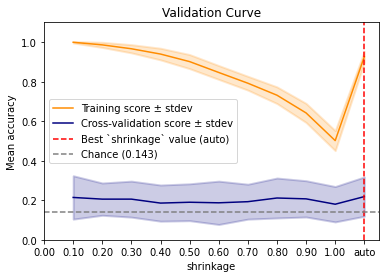

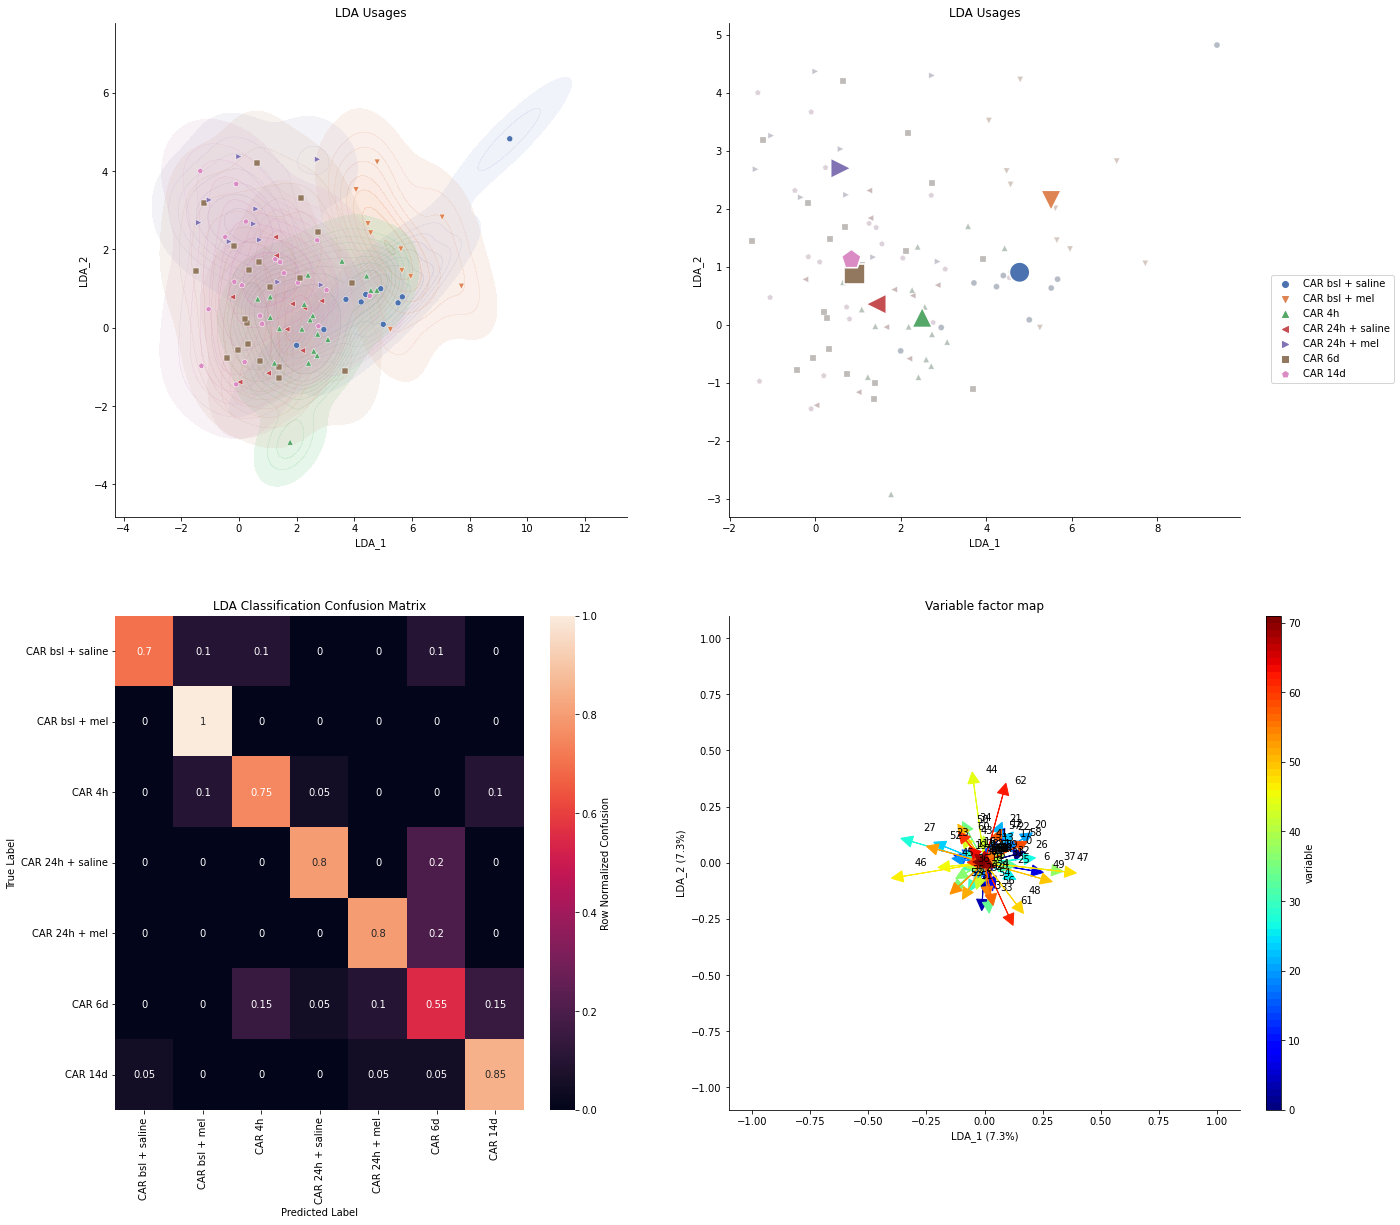

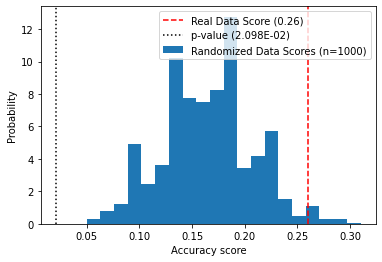

In [4]:
results = train_lda_pipeline(representations, 'usages', lda_kwargs={'n_components': 2})
plot_validation_curve(results.cv_result)
fig, axs, df = plot_lda_results(results.final, representations, aes=aes, title='LDA Usages')
plot_permutation_score(results.final.estimator, results.data.usages, results.data.groups)

LDA Score: 0.9285714285714286
LDA Explained Variance: [0.07345048 0.07345045]
                  precision    recall  f1-score   support

         CAR 14d       0.87      0.93      0.90        14
   CAR 24h + mel       0.88      1.00      0.93         7
CAR 24h + saline       1.00      1.00      1.00         7
          CAR 4h       0.93      0.93      0.93        14
          CAR 6d       0.92      0.79      0.85        14
   CAR bsl + mel       1.00      1.00      1.00         7
CAR bsl + saline       1.00      1.00      1.00         7

        accuracy                           0.93        70
       macro avg       0.94      0.95      0.94        70
    weighted avg       0.93      0.93      0.93        70

LDA Score: 0.36666666666666664
LDA Explained Variance: [0.07345048 0.07345045]
                  precision    recall  f1-score   support

         CAR 14d       0.57      0.67      0.62         6
   CAR 24h + mel       0.33      0.33      0.33         3
CAR 24h + saline       0.33

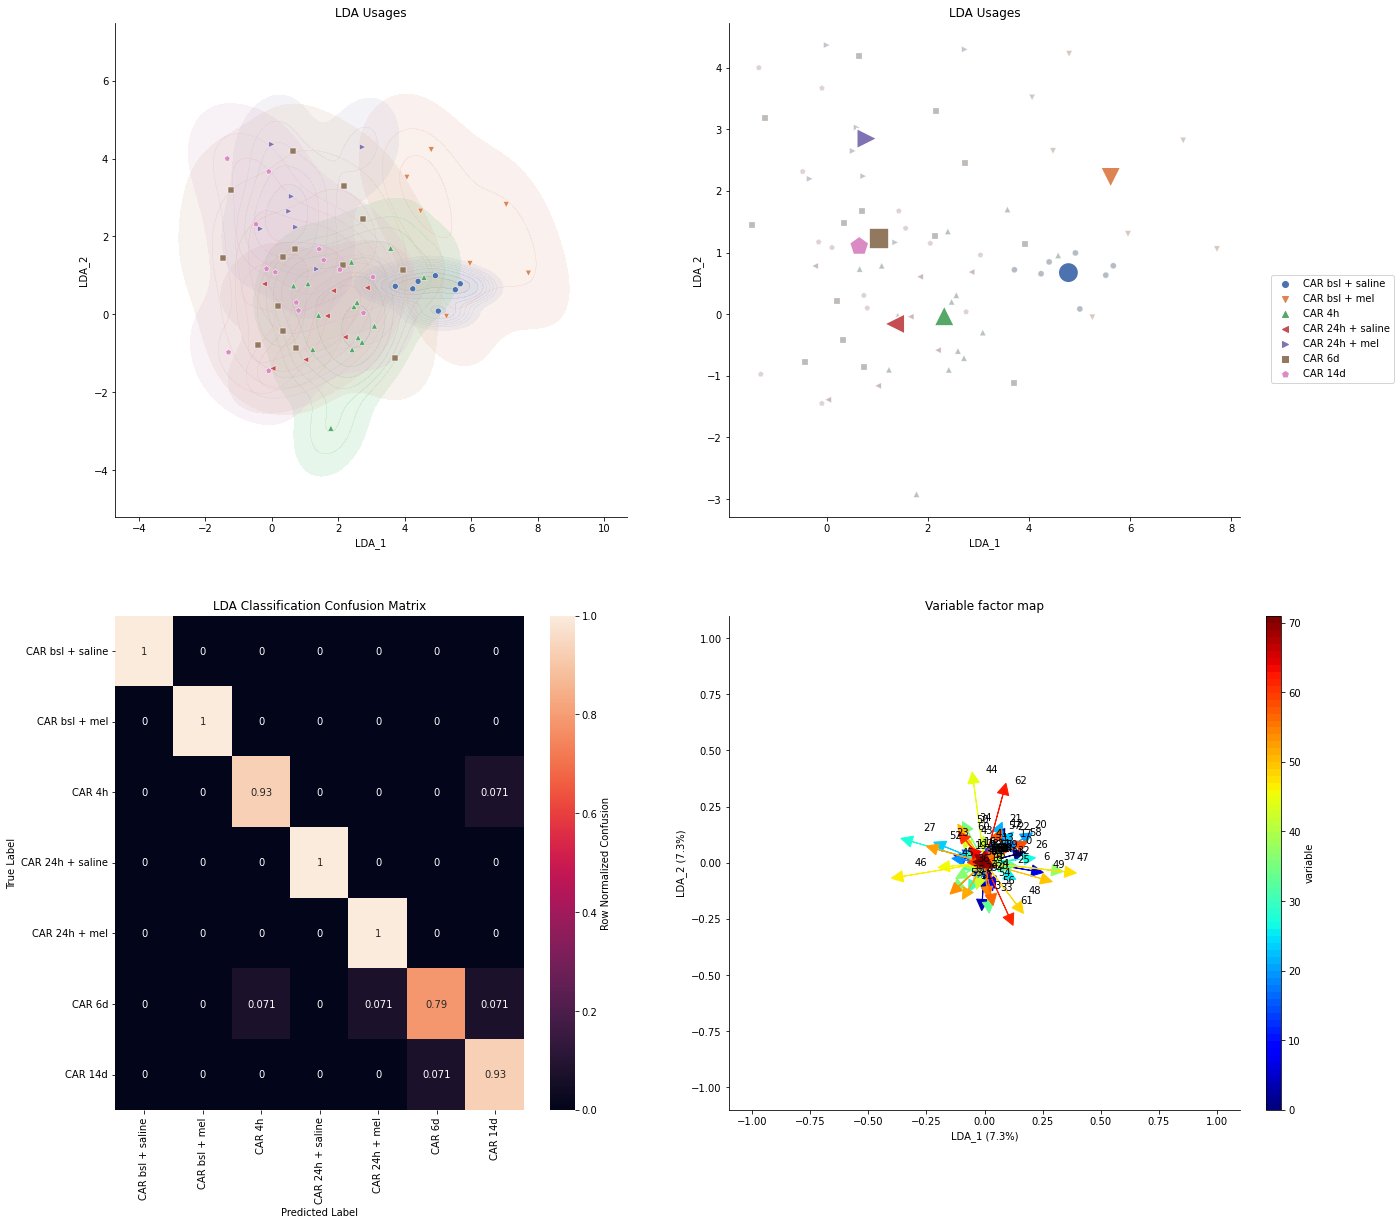

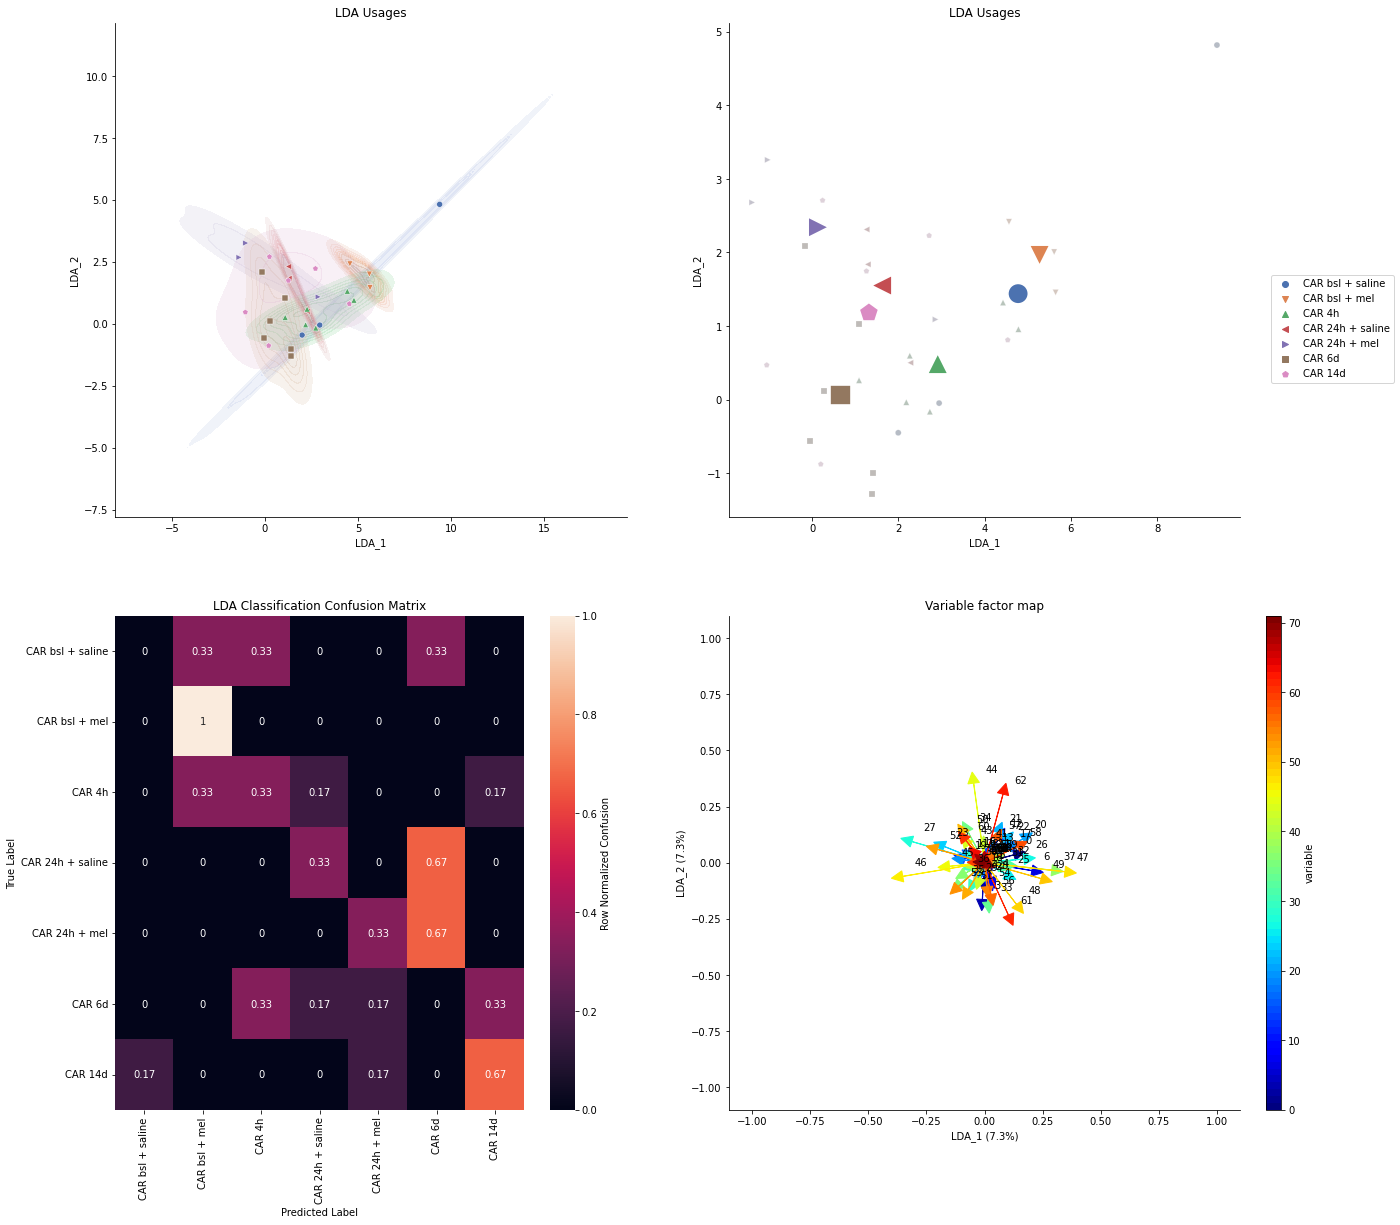

In [5]:
fig, axs, df = plot_lda_results(results.final, results.train, aes=aes, title='LDA Usages')
fig, axs, df = plot_lda_results(results.final, results.test, aes=aes, title='LDA Usages')